In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [811]:
data  = pd.read_csv("data.csv")


### This dataset i downloaded from the provided link.
### It contains 100,000 records
#### It dosen't contain the Longitude and Latitudes.
#### therefore i fetched the data through an socdata api but just got the data of Febraury I will use that dataset for the location questions and for all other question which doesn't require location i will use this data.


In [3]:
data.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,PULocationID,DOLocationID
count,99998.000000,99998.000000,99998.000000,0.0,0.0,99998.000000,0.0,0.0,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000
mean,1.539931,1.655333,3.002268,NaN,NaN,1.043081,NaN,NaN,1.356747,13.268126,0.331895,0.497365,1.798682,0.310051,0.299670,16.510318,162.158513,160.020530
std,0.498686,1.296201,3.791090,NaN,NaN,0.426204,NaN,NaN,0.497817,11.351680,0.453944,0.039441,2.558919,1.439872,0.013678,13.910972,66.827310,70.500757
min,1.000000,0.000000,0.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,-120.000000,-1.000000,-0.500000,-1.250000,0.000000,-0.300000,-120.300000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.760000,113.000000,107.000000
50%,2.000000,1.000000,1.700000,NaN,NaN,1.000000,NaN,NaN,1.000000,9.500000,0.000000,0.500000,1.260000,0.000000,0.300000,12.300000,161.000000,162.000000
75%,2.000000,2.000000,3.190000,NaN,NaN,1.000000,NaN,NaN,2.000000,15.000000,0.500000,0.500000,2.450000,0.000000,0.300000,18.350000,233.000000,232.000000
max,3.000000,6.000000,123.200000,NaN,NaN,99.000000,NaN,NaN,4.000000,400.000000,4.500000,1.500000,111.800000,95.000000,0.300000,400.300000,265.000000,265.000000


In [4]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,PULocationID,DOLocationID
0,2,8/17/2016 11:31,8/17/2016 12:03,5,5.29,NaN,NaN,1,N,NaN,...,1,23.5,0.0,0.5,4.86,0.0,0.3,29.16,88,48
1,2,7/13/2016 21:32,7/13/2016 21:50,1,7.33,NaN,NaN,1,N,NaN,...,1,23.5,0.5,0.5,6.20,0.0,0.3,31.00,138,130
2,2,9/20/2016 8:10,9/20/2016 8:18,3,3.13,NaN,NaN,1,N,NaN,...,2,11.0,0.0,0.5,0.00,0.0,0.3,11.80,132,10
3,1,10/28/2016 0:31,10/28/2016 0:36,1,1.10,NaN,NaN,1,N,NaN,...,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30,37,37
4,2,10/25/2016 18:38,10/25/2016 18:59,1,1.39,NaN,NaN,1,N,NaN,...,2,12.5,1.0,0.5,0.00,0.0,0.3,14.30,161,186


In [5]:
data.shape

(99998, 21)

In [6]:
month =[]
for element in data.tpep_pickup_datetime:
    e = element[0:2]
    e =str(e)
    e = e.replace('/',"")
    month.append(e)
month_data = pd.DataFrame(month)
#month_data

In [7]:
new_data = pd.concat([data,month_data], axis=1)
new_data.rename(columns = {0:'Month'},inplace=True)
#new_data

#### As many question contain "per month" i will slice the dataset in dataframes per month

In [8]:
july_data = new_data[new_data["Month"] == "7"]
august_data = new_data[new_data["Month"] == "8"]
september_data = new_data[new_data["Month"] == "9"]
october_data = new_data[new_data["Month"] == "10"]
november_data = new_data[new_data["Month"] == "11"]
december_data = new_data[new_data["Month"] == "12"]


### Question 1:
#### How many monthly pickups are there per month? Which month had the highest figure?

In [9]:
count_7 = july_data.shape[0]
count_8 = august_data.shape[0]
count_9 = september_data.shape[0]
count_10 = october_data.shape[0]
count_11 = november_data.shape[0]
count_12 = december_data.shape[0]

print(
"\n Number of pickups done July: ",count_7,
"\n Number of pickups done August: ",count_8,
"\n Number of pickups done September: ",count_9,
"\n Number of pickups done October: ",count_10,
"\n Number of pickups done November: ",count_11,
"\n Number of pickups done December: ",count_12 )

highest  = max(count_7,count_8,count_9,count_10,count_11,count_12)
print("\n\n\nHighest number of pickups done in October, total number: ",highest)
    


 Number of pickups done July:  16498 
 Number of pickups done August:  16186 
 Number of pickups done September:  16449 
 Number of pickups done October:  17503 
 Number of pickups done November:  16262 
 Number of pickups done December:  17100



Highest number of pickups done in October, total number:  17503


         July  August  September  October  November  December
Months  16498   16186      16449    17503     16262     17100


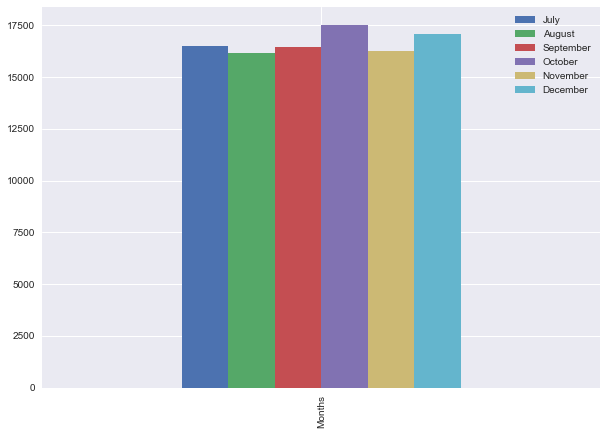

In [826]:
tmp = [count_7,count_8,count_9,count_10,count_11, count_12,] 
                                                                                                        
df_tmp = pd.DataFrame(tmp) 
df_tmp.rename(columns = {0:'Months'},inplace=True)
df_tmp = df_tmp.T
df_tmp.rename(columns = {0:'July'},inplace=True)
df_tmp.rename(columns = {1:'August'},inplace=True)
df_tmp.rename(columns = {2:'September'},inplace=True)
df_tmp.rename(columns = {3:'October'},inplace=True)
df_tmp.rename(columns = {4:'November'},inplace=True)
df_tmp.rename(columns = {5:'December'},inplace=True)
print(df_tmp)
df_tmp.plot(kind="bar", figsize=(10,7))

plt.show()

### Question 2:
#### What time of the day were most of the pickups, per month? Which month had the highest figure?

In [817]:
def timeOfday_mostPickup(df):
    tmp_list = []
    for element in df.tpep_pickup_datetime:
        t1 = element[-4]
        t2 = element[-5]
        time = t2 +t1
        time = int(time)
        tmp_list.append(time)
    max_number = max(tmp_list,key=tmp_list.count)
    return max_number


print("Time of the day when most of the pickups were done in July is : ", timeOfday_mostPickup(july_data),"Hours in 24 Hours time format")
print("Time of the day when most of the pickups were done in August is : ", timeOfday_mostPickup(august_data),"Hours in 24 Hours time format")
print("Time of the day when most of the pickups were done in September is : ", timeOfday_mostPickup(september_data),"Hours in 24 Hours time format")
print("Time of the day when most of the pickups were done in October is : ", timeOfday_mostPickup(october_data),"Hours in 24 Hours time format")
print("Time of the day when most of the pickups were done in November is : ", timeOfday_mostPickup(november_data),"Hours in 24 Hours time format")
print("Time of the day when most of the pickups were done in December is : ", timeOfday_mostPickup(december_data),"Hours in 24 Hours time format")
    
     

Time of the day when most of the pickups were done in July is :  19 Hours in 24 Hours time format
Time of the day when most of the pickups were done in August is :  19 Hours in 24 Hours time format
Time of the day when most of the pickups were done in September is :  19 Hours in 24 Hours time format
Time of the day when most of the pickups were done in October is :  19 Hours in 24 Hours time format
Time of the day when most of the pickups were done in November is :  18 Hours in 24 Hours time format
Time of the day when most of the pickups were done in December is :  20 Hours in 24 Hours time format


### Question : 3
#### What was the longest trip, per month? Which month had the highest figure?

In [816]:
def longest(df):
    longest_trip = 0
    list_tmp = list(df['trip_distance'])
    longest_trip = max(list_tmp)
    return longest_trip

longest_july = longest(july_data)
longest_aug = longest(august_data)
longest_sep = longest(september_data)
longest_oct = longest(october_data)
longest_nov = longest(november_data)
longest_dec = longest(december_data)

print("Longest Trip In July : ", longest_july,"miles")
print("Longest Trip In August : ", longest_aug,"miles")
print("Longest Trip In September : ", longest_sep,"miles")
print("Longest Trip In October : ", longest_oct,"miles")
print("Longest Trip In November : ", longest_nov,"miles")
print("Longest Trip In December : ", longest_dec,"miles")

longest_list = [longest_july,longest_aug, longest_sep, longest_oct, longest_nov, longest_dec]
longest_fig = max(longest_list)


print("\n\nLongest Trip was :",longest_fig," in October" )

Longest Trip In July :  58.4 miles
Longest Trip In August :  38.18 miles
Longest Trip In September :  71.8 miles
Longest Trip In October :  123.2 miles
Longest Trip In November :  91.1 miles
Longest Trip In December :  58.24 miles


Longest Trip was : 123.2  in October


        July  August  September  October  November  December
Months  58.4   38.18       71.8    123.2      91.1     58.24


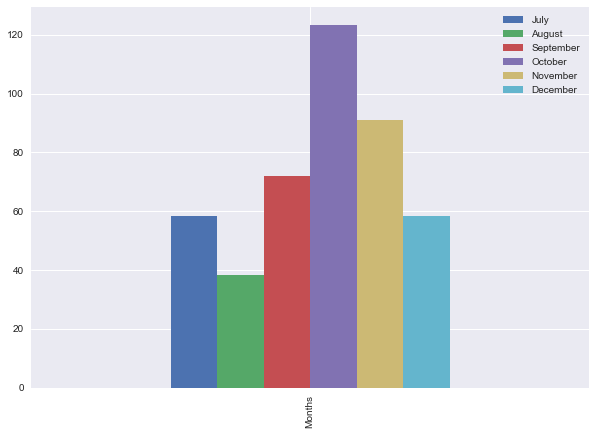



Longest Trip was : 123.2  in October


In [825]:
tmp = [longest_july,
longest_aug,
longest_sep,
longest_oct,
longest_nov,
longest_dec] 
                                                                                                        
df_tmp = pd.DataFrame(tmp) 
df_tmp.rename(columns = {0:'Months'},inplace=True)
df_tmp = df_tmp.T
df_tmp.rename(columns = {0:'July'},inplace=True)
df_tmp.rename(columns = {1:'August'},inplace=True)
df_tmp.rename(columns = {2:'September'},inplace=True)
df_tmp.rename(columns = {3:'October'},inplace=True)
df_tmp.rename(columns = {4:'November'},inplace=True)
df_tmp.rename(columns = {5:'December'},inplace=True)
print(df_tmp)
df_tmp.plot(kind="bar", figsize=(10,7))

plt.show()
print("\n\nLongest Trip was :",longest_fig," in October" )

### Question 4: 
#### Out of those longest trips what was the final destination and how much was the fare?

In [128]:
#def longest_fare(df):
df_long_july = data[data['trip_distance'] == longest_july]
long_fare_july = df_long_july.iloc[0]['fare_amount']

print("Longest trip in July was :", longest_july,"miles and the fare was ",long_fare_july)

Longest trip in July was : 58.4 miles and the fare was  130.0


In [130]:
df_long_august = data[data['trip_distance'] == longest_aug]
long_fare_august = df_long_august.iloc[0]['fare_amount']

print("Longest trip in august was :", longest_aug,"miles and the fare was ",long_fare_august)

Longest trip in august was : 38.18 miles and the fare was  130.0


In [131]:
df_long_september = data[data['trip_distance'] == longest_sep]
long_fare_september = df_long_september.iloc[0]['fare_amount']

print("Longest trip in september was :", longest_sep,"miles and the fare was ",long_fare_september)

Longest trip in september was : 71.8 miles and the fare was  52.0


In [132]:
df_long_october = data[data['trip_distance'] == longest_oct]
long_fare_october = df_long_october.iloc[0]['fare_amount']

print("Longest trip in october was :", longest_oct,"miles and the fare was ",long_fare_october)

Longest trip in october was : 123.2 miles and the fare was  14.0


In [133]:
df_long_november = data[data['trip_distance'] == longest_nov]
long_fare_november = df_long_november.iloc[0]['fare_amount']
print("Longest trip in november was :", longest_nov,"miles and the fare was ",long_fare_november)

Longest trip in november was : 91.1 miles and the fare was  0.0


In [134]:
df_long_december = data[data['trip_distance'] == longest_dec]
long_fare_december = df_long_december.iloc[0]['fare_amount']
print("Longest trip in november was :", longest_dec,"miles and the fare was ",long_fare_december)

Longest trip in november was : 58.24 miles and the fare was  239.0


         July  August  September  October  November  December
Months  130.0   130.0       52.0     14.0       0.0     239.0


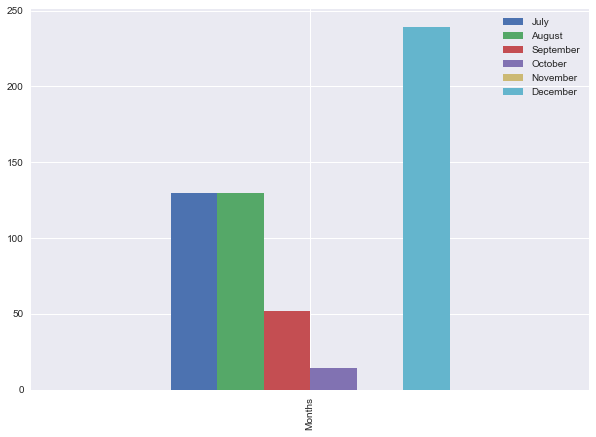

Longest trip in July was : 58.4 miles and the fare was  130.0
Longest trip in august was : 38.18 miles and the fare was  130.0
Longest trip in september was : 71.8 miles and the fare was  52.0
Longest trip in october was : 123.2 miles and the fare was  14.0
Longest trip in november was : 91.1 miles and the fare was  0.0
Longest trip in november was : 58.24 miles and the fare was  239.0


In [824]:
tmp = [long_fare_july,
long_fare_august,
long_fare_september,
long_fare_october,
long_fare_november,
long_fare_december] 
                                                                                                        
df_tmp = pd.DataFrame(tmp) 
df_tmp.rename(columns = {0:'Months'},inplace=True)
df_tmp = df_tmp.T
df_tmp.rename(columns = {0:'July'},inplace=True)
df_tmp.rename(columns = {1:'August'},inplace=True)
df_tmp.rename(columns = {2:'September'},inplace=True)
df_tmp.rename(columns = {3:'October'},inplace=True)
df_tmp.rename(columns = {4:'November'},inplace=True)
df_tmp.rename(columns = {5:'December'},inplace=True)
print(df_tmp)
df_tmp.plot(kind="bar", figsize=(10,7))

plt.show()

print("Longest trip in July was :", longest_july,"miles and the fare was ",long_fare_july)
print("Longest trip in august was :", longest_aug,"miles and the fare was ",long_fare_august)
print("Longest trip in september was :", longest_sep,"miles and the fare was ",long_fare_september)
print("Longest trip in october was :", longest_oct,"miles and the fare was ",long_fare_october)
print("Longest trip in november was :", longest_nov,"miles and the fare was ",long_fare_november)
print("Longest trip in november was :", longest_dec,"miles and the fare was ",long_fare_december)

<br>
<br>
<br>
<br>
<br>
### Question 5
#### What was the most expensive trip (excluding fees/tolls/tips), per month? Which month had the highest figure? Are these results related to question 4?

In [124]:
print("Most Expensive trip in July :",july_data.fare_amount.max())

Most Expensive trip in July : 166.75


#### The most expensive trip and the longest trip in July are not related! (from Question 4 and 5)
Longest trip fare: 130.0 <br>
Most expensive trip fare: 166.75
<br>
<br>
<br>
<br>
<br>

In [125]:
print("Most Expensive trip in August",august_data.fare_amount.max())

Most Expensive trip in August 250.0


#### The most expensive trip and the longest trip in August are not related!
Longest trip fare: 130.0 <br>
Most expensive trip fare: 250.0
<br>
<br>
<br>
<br>
<br>

In [127]:
print("Most Expensive trip in September",september_data.fare_amount.max())

Most Expensive trip in September 200.0


#### The most expensive trip and the longest trip in September are not related!
Longest trip fare: 52.0 <br>
Most expensive trip fare: 200.0
<br>
<br>
<br>
<br>
<br>

In [136]:
print("Most Expensive trip in October",october_data.fare_amount.max())

Most Expensive trip in October 400.0


#### The most expensive trip and the longest trip are October in not related!
Longest trip fare: 14.0 <br>
Most expensive trip fare: 400.0
<br>
<br>
<br>
<br>
<br>


In [138]:
print("Most Expensive trip in November",november_data.fare_amount.max())

Most Expensive trip in November 200.0


#### The most expensive trip and the longest trip in November are not related!
Longest trip fare: 0.0 <br>
Most expensive trip fare: 200.0
<br>
<br>
<br>
<br>
<br>

In [139]:
print("Most Expensive trip in December",december_data.fare_amount.max())

Most Expensive trip in December 239.0


#### The most expensive trip and the longest trip in December are  related
Longest trip fare: 239.0 <br>
Most expensive trip fare: 239.0
<br>
<br>
<br>
<br>
<br>

          July  August  September  October  November  December
Months  166.75   250.0      200.0    400.0     200.0     239.0


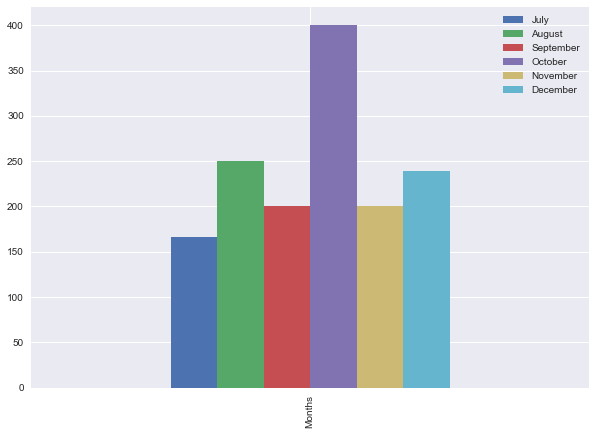

Most Expensive trip in July : 166.75
Most Expensive trip in August 250.0
Most Expensive trip in September 200.0
Most Expensive trip in October 400.0
Most Expensive trip in November 200.0
Most Expensive trip in December 239.0


In [823]:
tmp = [july_data.fare_amount.max(),
august_data.fare_amount.max(),
september_data.fare_amount.max(),
october_data.fare_amount.max(),
november_data.fare_amount.max(),
december_data.fare_amount.max()] 
                                                                                                        
df_tmp = pd.DataFrame(tmp) 
df_tmp.rename(columns = {0:'Months'},inplace=True)
df_tmp = df_tmp.T
df_tmp.rename(columns = {0:'July'},inplace=True)
df_tmp.rename(columns = {1:'August'},inplace=True)
df_tmp.rename(columns = {2:'September'},inplace=True)
df_tmp.rename(columns = {3:'October'},inplace=True)
df_tmp.rename(columns = {4:'November'},inplace=True)
df_tmp.rename(columns = {5:'December'},inplace=True)
print(df_tmp)
df_tmp.plot(kind="bar", figsize=(10,7))

plt.show()

print("Most Expensive trip in July :",july_data.fare_amount.max())
print("Most Expensive trip in August",august_data.fare_amount.max())
print("Most Expensive trip in September",september_data.fare_amount.max())
print("Most Expensive trip in October",october_data.fare_amount.max())
print("Most Expensive trip in November",november_data.fare_amount.max())
print("Most Expensive trip in December",december_data.fare_amount.max())

### Question 6
#### How many airport drop-offs are there per month, per airport? Which month and airport had the highest figure?

RateCodeID :
1= Standard rate<br>
2=JFK<br>
3=Newark<br>
4=Nassau or Westchester<br>
5=Negotiated fare<br>
6=Group ride<br>
#### From above RateCodeID  we can see that there are 3 Airport cateogorized by id:
    1) JFK airport (RateCodeID = 2) 
    2) Newark Airport (RateCodeID = 3) 
    3) Nassau Airport and Westchester Airport (RateCodeID = 4) 

### Lets start with July.

In [155]:
july_airport = july_data[(july_data["RatecodeID"] == 2) | (july_data["RatecodeID"] == 3) | (july_data["RatecodeID"] == 4 )]
print("Total Number of Airport Drop Off's in July :", july_airport.shape[0])

Total Number of Airport Drop Off's in July : 450


In [161]:
print("Total Dropoff at Newark Airport in July :", len(july_data[(july_data["RatecodeID"] == 2)]))

Total Dropoff at Newark Airport in July : 410


In [162]:
print("Total Dropoff at Newark Airport in July :", len(july_data[(july_data["RatecodeID"] == 3)]))

Total Dropoff at Newark Airport in July : 36


In [164]:
print("Total Dropoff at Nassau Airport and Westchester Airport in July :", len(july_data[(july_data["RatecodeID"] == 4)]))

Total Dropoff at Nassau Airport and Westchester Airport in July : 4


         JFK Airport  Newark Airport  Nassua or Westecheter Airport
Airport          410              36                              4


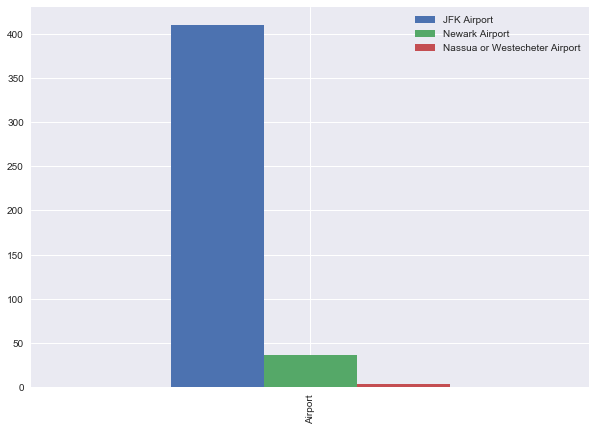

In [216]:
tmp = [len(july_data[(july_data["RatecodeID"] == 2)]),
       len(july_data[(july_data["RatecodeID"] == 3)]),
       len(july_data[(july_data["RatecodeID"] == 4)])]
                                                                                                        
df_tmp = pd.DataFrame(tmp) 
df_tmp.rename(columns = {0:'Airport'},inplace=True)
df_tmp = df_tmp.T
df_tmp.rename(columns = {0:'JFK Airport'},inplace=True)
df_tmp.rename(columns = {1:'Newark Airport'},inplace=True)
df_tmp.rename(columns = {2:'Nassua or Westecheter Airport'},inplace=True)
print(df_tmp)
df_tmp.plot(kind="bar", figsize=(10,7))

plt.show()

### August

In [218]:
august_airport = august_data[(august_data["RatecodeID"] == 2) | (august_data["RatecodeID"] == 3) | (august_data["RatecodeID"] == 4 )]
print("Total Number of Airport Drop Off's in August :", august_airport.shape[0])

Total Number of Airport Drop Off's in August : 474


         JFK Airport  Newark Airport  Nassua or Westecheter Airport
Airport          431              35                              8


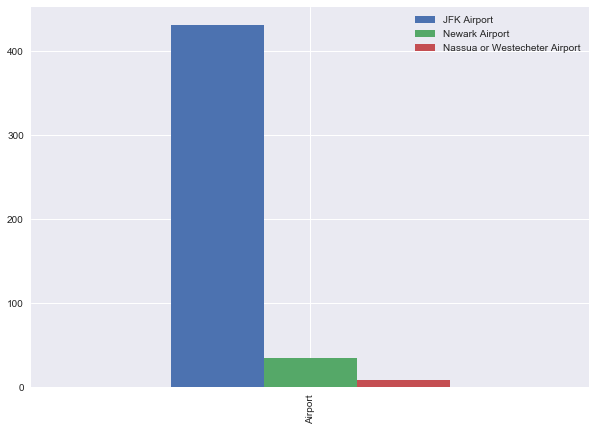

In [222]:
tmp = [len(august_data[(august_data["RatecodeID"] == 2)]),
       len(august_data[(august_data["RatecodeID"] == 3)]),
       len(august_data[(august_data["RatecodeID"] == 4)])]
                                                                                                        
df_tmp = pd.DataFrame(tmp) 
df_tmp.rename(columns = {0:'Airport'},inplace=True)
df_tmp = df_tmp.T
df_tmp.rename(columns = {0:'JFK Airport'},inplace=True)
df_tmp.rename(columns = {1:'Newark Airport'},inplace=True)
df_tmp.rename(columns = {2:'Nassua or Westecheter Airport'},inplace=True)
print(df_tmp)
df_tmp.plot(kind="bar", figsize=(10,7))

plt.show()

### September

In [219]:
september_airport = september_data[(september_data["RatecodeID"] == 2) | (september_data["RatecodeID"] == 3) | (september_data["RatecodeID"] == 4 )]
print("Total Number of Airport Drop Off's in September :", september_airport.shape[0])

Total Number of Airport Drop Off's in September : 439


         JFK Airport  Newark Airport  Nassua or Westecheter Airport
Airport          398              32                              9


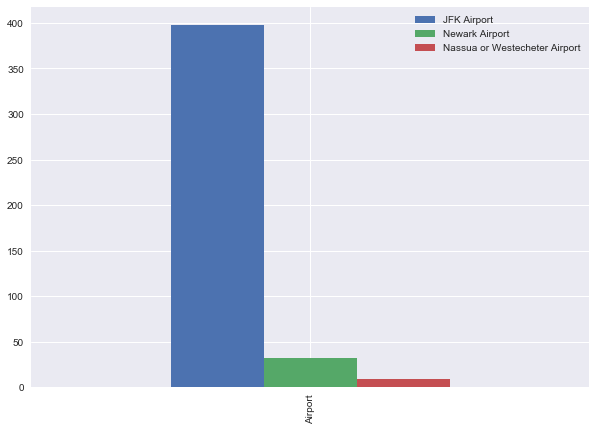

In [223]:
tmp = [len(september_data[(september_data["RatecodeID"] == 2)]),
       len(september_data[(september_data["RatecodeID"] == 3)]),
       len(september_data[(september_data["RatecodeID"] == 4)])]
                                                                                                        
df_tmp = pd.DataFrame(tmp) 
df_tmp.rename(columns = {0:'Airport'},inplace=True)
df_tmp = df_tmp.T
df_tmp.rename(columns = {0:'JFK Airport'},inplace=True)
df_tmp.rename(columns = {1:'Newark Airport'},inplace=True)
df_tmp.rename(columns = {2:'Nassua or Westecheter Airport'},inplace=True)
print(df_tmp)
df_tmp.plot(kind="bar", figsize=(10,7))

plt.show()

### October

In [220]:
october_airport = october_data[(october_data["RatecodeID"] == 2) | (october_data["RatecodeID"] == 3) | (october_data["RatecodeID"] == 4 )]
print("Total Number of Airport Drop Off's in October :", october_airport.shape[0])

Total Number of Airport Drop Off's in October : 457


         JFK Airport  Newark Airport  Nassua or Westecheter Airport
Airport          408              42                              7


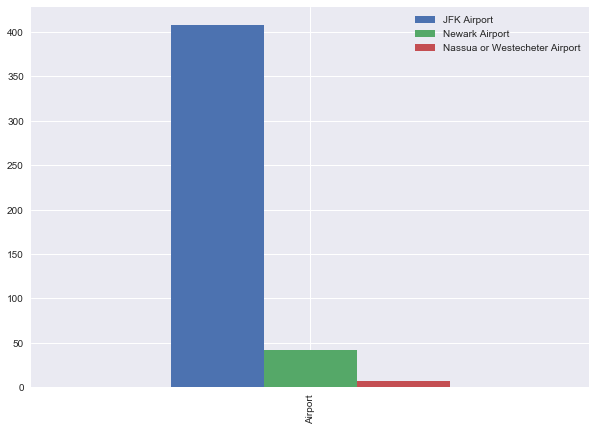

In [226]:
tmp = [len(october_data[(october_data["RatecodeID"] == 2)]),
       len(october_data[(october_data["RatecodeID"] == 3)]),
       len(october_data[(october_data["RatecodeID"] == 4)])]
                                                                                                        
df_tmp = pd.DataFrame(tmp) 
df_tmp.rename(columns = {0:'Airport'},inplace=True)
df_tmp = df_tmp.T
df_tmp.rename(columns = {0:'JFK Airport'},inplace=True)
df_tmp.rename(columns = {1:'Newark Airport'},inplace=True)
df_tmp.rename(columns = {2:'Nassua or Westecheter Airport'},inplace=True)
print(df_tmp)
df_tmp.plot(kind="bar", figsize=(10,7))

plt.show()

### November

In [221]:
november_airport = november_data[(november_data["RatecodeID"] == 2) | (november_data["RatecodeID"] == 3) | (november_data["RatecodeID"] == 4 )]
print("Total Number of Airport Drop Off's in November :", november_airport.shape[0])

Total Number of Airport Drop Off's in November : 406


         JFK Airport  Newark Airport  Nassua or Westecheter Airport
Airport          363              32                             11


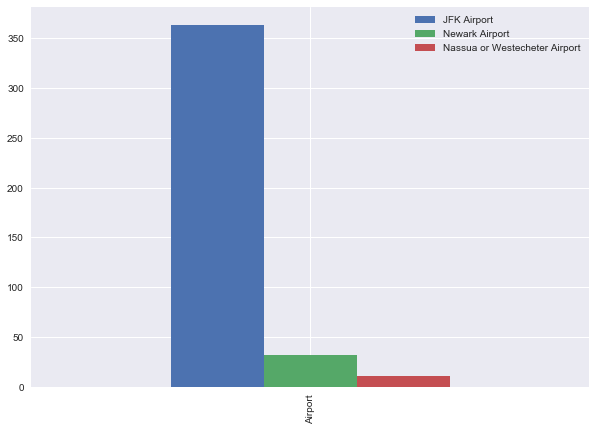

In [227]:
tmp = [len(november_data[(november_data["RatecodeID"] == 2)]),
       len(november_data[(november_data["RatecodeID"] == 3)]),
       len(november_data[(november_data["RatecodeID"] == 4)])]
                                                                                                        
df_tmp = pd.DataFrame(tmp) 
df_tmp.rename(columns = {0:'Airport'},inplace=True)
df_tmp = df_tmp.T
df_tmp.rename(columns = {0:'JFK Airport'},inplace=True)
df_tmp.rename(columns = {1:'Newark Airport'},inplace=True)
df_tmp.rename(columns = {2:'Nassua or Westecheter Airport'},inplace=True)
print(df_tmp)
df_tmp.plot(kind="bar", figsize=(10,7))

plt.show()

### December

In [228]:
december_airport = december_data[(december_data["RatecodeID"] == 2) | (december_data["RatecodeID"] == 3) | (december_data["RatecodeID"] == 4 )]
print("Total Number of Airport Drop Off's in December :", december_airport.shape[0])

Total Number of Airport Drop Off's in December : 405


         JFK Airport  Newark Airport  Nassua or Westecheter Airport
Airport          363              34                              8


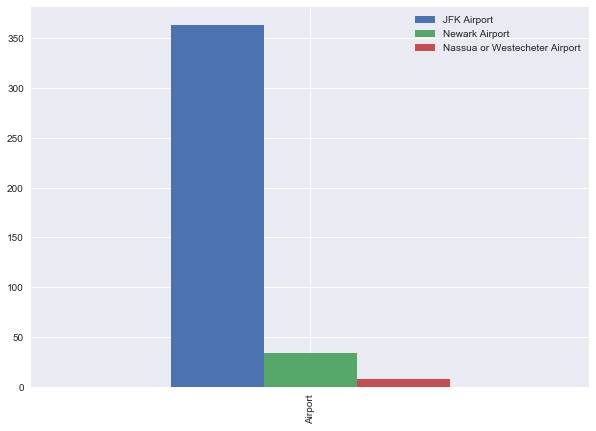

In [243]:
tmp = [len(december_data[(december_data["RatecodeID"] == 2)]),
       len(december_data[(december_data["RatecodeID"] == 3)]),
       len(december_data[(december_data["RatecodeID"] == 4)])]
                                                                                                        
df_tmp = pd.DataFrame(tmp) 
df_tmp.rename(columns = {0:'Airport'},inplace=True)
df_tmp = df_tmp.T
df_tmp.rename(columns = {0:'JFK Airport'},inplace=True)
df_tmp.rename(columns = {1:'Newark Airport'},inplace=True)
df_tmp.rename(columns = {2:'Nassua or Westecheter Airport'},inplace=True)
print(df_tmp)
df_tmp.plot(kind="bar", figsize=(10,7))


plt.show()

### Highest Number of DropOff's
     

In [234]:
temp = [july_airport.shape[0],august_airport.shape[0],september_airport.shape[0],october_airport.shape[0],november_airport.shape[0],december_airport.shape[0]]

           Months
July          450
August        474
September     439
October       457
November      406
December      405


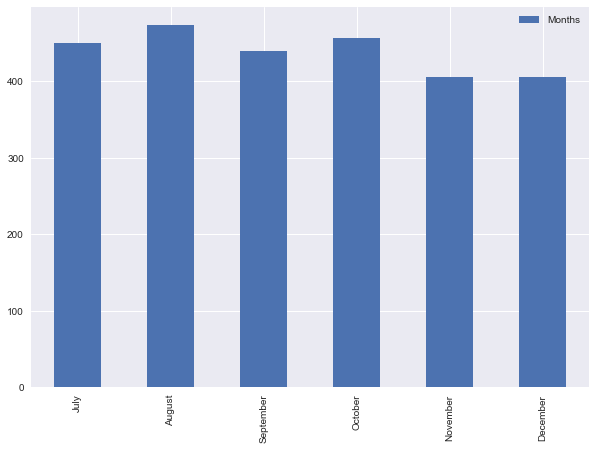

In [245]:
df_temp = pd.DataFrame(temp)
df_temp.rename(columns = {0:'Months'},inplace=True)
indexlist = ["July", "August", "September","October" ,"November", "December"]
df_temp.index = indexlist
print(df_temp)
df_temp.plot(kind="bar", figsize=(10,7))

## Highest Drofoff Per Month : August (Droffoffs: 474)
  

<br>
<br>
<br>
### Now lets calulate highest droffoff per AIrport

In [269]:
FK_total = len(december_data[(december_data["RatecodeID"] == 2)]) + len(november_data[(november_data["RatecodeID"] == 2)]) + len(october_data[(october_data["RatecodeID"] == 2)]) + len(september_data[(september_data["RatecodeID"] == 2)])+ len(august_data[(august_data["RatecodeID"] == 2)]) + len(july_data[(july_data["RatecodeID"] == 2)]) 
Newark_total = len(december_data[(december_data["RatecodeID"] == 3)]) + len(november_data[(november_data["RatecodeID"] == 3)]) + len(october_data[(october_data["RatecodeID"] == 3)]) + len(september_data[(september_data["RatecodeID"] == 3)])+ len(august_data[(august_data["RatecodeID"] == 3)]) + len(july_data[(july_data["RatecodeID"] == 3)]) 
Nassau_westecheter_total = len(december_data[(december_data["RatecodeID"] == 4)]) + len(november_data[(november_data["RatecodeID"] == 4)]) + len(october_data[(october_data["RatecodeID"] == 4)]) + len(september_data[(september_data["RatecodeID"] == 4)])+ len(august_data[(august_data["RatecodeID"] == 4)]) + len(july_data[(july_data["RatecodeID"] == 4)]) 
temp =[JFK_total, Newark_total, Nassau_westecheter_total]

print(temp)

[2373, 211, 47]


                        Months
JFK                       2373
Newark                     211
Nassau and Westecheter      47


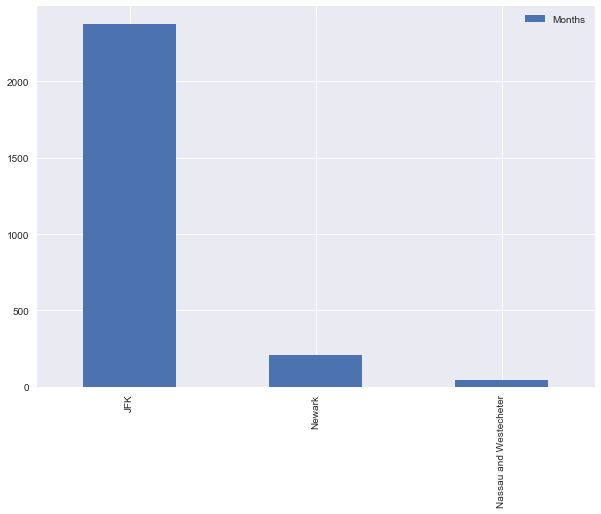

In [271]:
df_temp = pd.DataFrame(temp)
df_temp.rename(columns = {0:'Months'},inplace=True)
indexlist = ["JFK", "Newark", "Nassau and Westecheter"]
df_temp.index = indexlist
print(df_temp)
df_temp.plot(kind="bar", figsize=(10,7))

## Highest Drofoff Per Airport: JFK(Total: 2373)



<br>
<br>
<br>
### Question 7
#### Which payment, made per month, had the highest occurrence, Cash or Credit Card? What were the total figures per type?

1= Credit card <br>
2= Cash

In [272]:
def payment_type(df):
    cr = df[df["payment_type"] == 1].shape[0]
    ca = df[df["payment_type"] == 2]
    return cr, ca.shape[0]

In [294]:
july_credit, july_cash = payment_type(july_data)
print("Credit Cards Payment in July : ", july_credit, "\nCash Payment in July : ",july_cash)

Credit Cards Payment in July :  10750 
Cash Payment in July :  5657


##### Credit card has highest occurence in July

In [295]:
august_credit, august_cash = payment_type(august_data)
print("Credit Cards Payment in august : ", august_credit, "\nCash Payment in august : ",august_cash)

Credit Cards Payment in august :  10428 
Cash Payment in august :  5654


##### Credit card has highest occurence in August

In [297]:
september_credit, september_cash = payment_type(september_data)
print("Credit Cards Payment in september : ", september_credit, "\nCash Payment in september : ",september_cash)

Credit Cards Payment in september :  10797 
Cash Payment in september :  5555


##### Credit card has highest occurence in September

In [298]:
october_credit, october_cash = payment_type(october_data)
print("Credit Cards Payment in October : ", october_credit, "\nCash Payment in october : ",october_cash)

Credit Cards Payment in October :  11574 
Cash Payment in october :  5804


##### Credit card has highest occurence in October

In [299]:
november_credit, november_cash = payment_type(november_data)
print("Credit Cards Payment in november : ", november_credit, "\nCash Payment in november : ",november_cash)

Credit Cards Payment in november :  10633 
Cash Payment in november :  5535


##### Credit card has highest occurence in November

In [300]:
december_credit, december_cash = payment_type(december_data)
print("Credit Cards Payment in december : ", december_credit, "\nCash Payment in december : ",december_cash)

Credit Cards Payment in december :  10906 
Cash Payment in december :  6094


##### Credit card has highest occurence in December

In [301]:
all_credit = [july_credit, august_credit, september_credit, october_credit, november_credit,december_credit]
all_cash = [july_cash, august_cash, september_cash, october_cash, november_cash,december_cash]

           Months
July         5657
August       5654
September    5555
October      5804
November     5535
December     6094


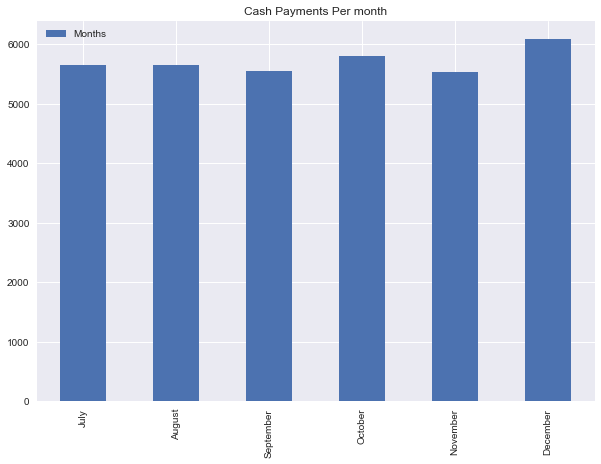

In [304]:
df_temp = pd.DataFrame(all_cash)
df_temp.rename(columns = {0:'Months'},inplace=True)
indexlist = ["July", "August", "September","October" ,"November", "December"]
df_temp.index = indexlist

print(df_temp)
df_temp.plot(kind="bar", figsize=(10,7), title= "Cash Payments Per month")

##### December had Highest number of Cash payments
<br>
<br>
<br>
<br><br>
<br>
#### Calucating Credit card Payements

           Months
July        10750
August      10428
September   10797
October     11574
November    10633
December    10906


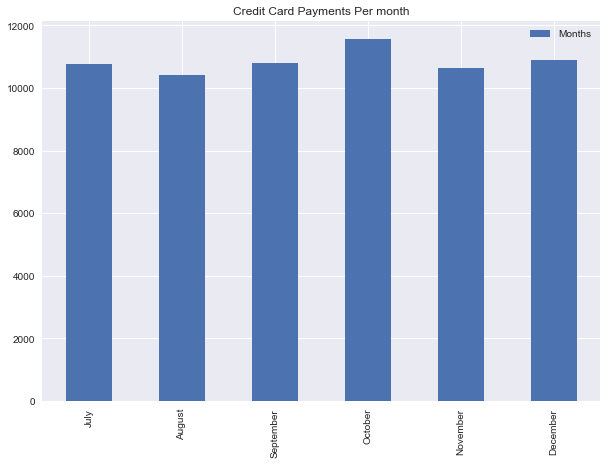

In [303]:
df_temp = pd.DataFrame(all_credit)
df_temp.rename(columns = {0:'Months'},inplace=True)
indexlist = ["July", "August", "September","October" ,"November", "December"]
df_temp.index = indexlist

print(df_temp)
df_temp.plot(kind="bar", figsize=(10,7), title= "Credit Card Payments Per month")

##### December had Highest number of Cash payments

### Question 8:
#### Which locations had the highest pickup and drop-off rate per month and how many passengers? (It will be nice if you correlate the pickup_longitude, pickup_latitude and dropoff_longitude, dropoff_latitude with physical locations)

## NOTE: for loaction question  I am using different dataset which has 999 Rows and it contains the Latitude and longitude  other dataset didnt conatin it but it has more rows that is 99998 wos therefore all the non location question i did it on thata dataset


#### Below dataset contais only the entry of month Februray. The Scodata api which was provided by the dataset provider could only return the entroes of month Februray otherwise it would return the dataset without Latitude and Lonitude

## Answer 8:

In [773]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
data_loaction.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,PULocationID,DOLocationID
0,1,2/1/2016 20:48,2/1/2016 20:57,1,2.3,0.000000,0.000000,1,Y,0.000000,...,1,9.5,0.5,0.5,2.00,0.00,0.3,12.80,NaN,NaN
1,1,2/9/2016 19:08,2/9/2016 19:28,1,2.9,-73.986984,40.750744,1,Y,-73.977028,...,1,15.0,1.0,0.5,4.20,0.00,0.3,21.00,NaN,NaN
2,1,2/1/2016 13:50,2/1/2016 13:55,1,1.2,-74.012428,40.706787,1,Y,-74.002739,...,1,6.0,0.0,0.5,1.35,0.00,0.3,8.15,NaN,NaN
3,1,2/27/2016 15:14,2/27/2016 15:18,1,1.0,-74.000092,40.737709,1,Y,-74.002541,...,2,5.5,0.0,0.5,0.00,0.00,0.3,6.30,NaN,NaN
4,1,2/10/2016 13:34,2/10/2016 14:22,2,17.6,-73.790359,40.643837,2,Y,-73.982681,...,2,52.0,0.0,0.5,0.00,5.54,0.3,58.34,NaN,NaN


### Now lets combine the Pickup Latitude and Longitude and add the combined result into the dataframe.

In [774]:
long = []
for d in filtered_data.pickup_longitude:
    long.append(d)
#print(len(long))    
lat = []
for d in filtered_data.pickup_latitude:
    lat.append(d)

ans= []
for la, lon in zip(lat, long):
    r = str(la) + " "+str(lon)
    ans.append(r)
    
pick_cor = ans
    #pick_cor = list(zip(lat, long))

In [775]:
loc = pd.DataFrame(pick_cor)

loc_df = pd.concat([filtered_data,loc], axis=1)
loc_df.rename(columns = {0:"Pickup Location"}, inplace=True)

In [776]:
loc_count = loc_df["Pickup Location"].value_counts()
#loc_count

### Now lets combine the Pickup Latitude and Longitude and add the combined result into the dataframe.

In [777]:
long = []
for d in filtered_data.dropoff_longitude:
    long.append(d)
#print(len(long))    
lat = []
for d in filtered_data.dropoff_latitude:
    lat.append(d)
ans= []
for la, lon in zip(lat, long):
    r = str(la) + " "+str(lon)
    ans.append(r)
    
drop_cor = ans

In [778]:
loc = pd.DataFrame(drop_cor)

loc_df = pd.concat([loc_df,loc], axis=1)
loc_df.rename(columns = {0:"Dropoff Location"}, inplace=True)

In [805]:
loc_df.head()

,Time,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,PULocationID,DOLocationID,Pickup Location,Dropoff Location
0,22,1,2/3/2016 22:44,2/3/2016 22:56,1,1.9,-73.981392,40.760807,1,Y,...,0.5,0.5,2.25,0.0,0.3,13.55,NaN,NaN,40.76080704 -73.98139191,40.74060059 -73.97870636
1,23,1,2/12/2016 23:47,2/12/2016 23:53,1,0.9,-74.007889,40.715183,1,Y,...,0.5,0.5,1.45,0.0,0.3,8.75,NaN,NaN,40.71518326 -74.00788879,40.71299744 -73.99603271
2,23,1,2/14/2016 23:04,2/14/2016 23:09,3,0.7,-73.985977,40.730968,1,Y,...,0.5,0.5,1.00,0.0,0.3,7.80,NaN,NaN,40.73096848 -73.98597717,40.72185898 -73.99198151
3,22,1,2/7/2016 22:56,2/7/2016 23:06,1,1.6,-73.933754,40.802654,1,Y,...,0.5,0.5,1.00,0.0,0.3,10.80,NaN,NaN,40.80265427 -73.93375397,40.8092804 -73.95526886
4,22,1,2/8/2016 22:41,2/8/2016 22:49,3,2.7,-73.983345,40.693703,1,Y,...,0.5,0.5,2.35,0.0,0.3,14.15,NaN,NaN,40.6937027 -73.98334503,40.72790146 -73.99913788


### We can see the Pickup Location and Dropoff Location added in the dataframe
#### now lets check the top pickup locations and dropoff locations

In [780]:
loc_count = loc_df["Dropoff Location"].value_counts()
t = loc_count[3]
print(loc_count[0:3])

0.0 0.0                     7
40.78582382 -73.98005676    1
40.75576019 -73.96172333    1
Name: Dropoff Location, dtype: int64


In [806]:
l1 = geolocator.reverse("0.0, 0.0")
l2 = geolocator.reverse("40.78582382, -73.98005676")
l3 = geolocator.reverse("40.75576019, -73.96172333")
l=[]
l.append(l1)
l.append(l2)
l.append(l3)
print("Top DropOff Locations : \n", l)

Top DropOff Locations : 
 [Location(None, (0.0, 0.0, 0.0)), Location(440, West End Ave., Upper West Side, Manhattan Community Board 7, New York County, NYC, New York, 10024, United States of America, (40.7857673, -73.9798991, 0.0)), Location(45, Sutton Place South, Tudor City, Manhattan Community Board 6, New York County, NYC, New York, 10022, United States of America, (40.7558143, -73.9615657, 0.0))]


##### above Output:
#### Top Dropoff Locations:
0.0, 0.0, 0.0
<br><br>
440, West End Ave., Upper West Side, Manhattan Community Board 7, New York County, NYC, New York, 10024, United States of America
<br><br>
45, Sutton Place South, Tudor City, Manhattan Community Board 6, New York County, NYC, New York, 10022, United States of America

In [808]:
loc_count = loc_df["Pickup Location"].value_counts()
t = loc_count[3]
print(loc_count[0:3])

0.0 0.0                     3
40.71941757 -74.00875854    1
40.77375412 -73.87090302    1
Name: Pickup Location, dtype: int64


In [809]:
l1 = geolocator.reverse("0.0, 0.0")
l2 = geolocator.reverse("40.71941757, -74.00875854")
l3 = geolocator.reverse("40.77375412, -73.87090302 ")
l=[]
l.append(l1)
l.append(l2)
l.append(l3)
print("Top Pickup Locations : \n", l)

Top Pickup Locations : 
 [Location(None, (0.0, 0.0, 0.0)), Location(Powell Building, Franklin Street, Tribeca, Manhattan Community Board 1, New York County, NYC, New York, 10013, United States of America, (40.7194907, -74.0090173809577, 0.0)), Location(Duty Free, Departures, North Beach, Queens County, NYC, New York, 11356, United States of America, (40.7742449, -73.8704951, 0.0))]


### Top Pickup Locations:
0.0, 0.0, 0.0 
<br><br>
Powell Building, Franklin Street, Tribeca, Manhattan Community Board 1, New York County, NYC, New York, 10013, United States of America
<br><br>
Duty Free, Departures, North Beach, Queens County, NYC, New York, 11356, United States of America

### From above outputs we can see that there are some wrong points in the dataset which have locations as 0.0, 0.0, 0.0 

### Question 9
#### Trip duration (travel time) to JFK airport per time of the day. What time of the day takes the longest? (Hint: Show median, 25-75th percentile, etc…)

In [339]:
jfk_data = data[data['RatecodeID'] == 2 ]

In [340]:
jfk_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'PULocationID',
       'DOLocationID'],
      dtype='object')

In [341]:
jfk_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,PULocationID,DOLocationID
31,2,7/10/2016 7:15,7/10/2016 7:38,5,17.21,NaN,NaN,2,N,NaN,...,1,52.0,0.0,0.5,11.67,5.54,0.3,70.01,132,162
34,1,7/28/2016 14:34,7/28/2016 15:47,3,17.80,NaN,NaN,2,N,NaN,...,1,52.0,0.0,0.5,6.00,11.08,0.3,69.88,132,161
68,1,9/21/2016 14:34,9/21/2016 16:01,2,17.70,NaN,NaN,2,N,NaN,...,2,52.0,0.0,0.5,0.00,5.54,0.3,58.34,132,229
112,2,8/5/2016 12:57,8/5/2016 13:34,2,16.13,NaN,NaN,2,N,NaN,...,1,52.0,0.0,0.5,6.00,5.54,0.3,64.34,162,132
136,2,10/10/2016 5:35,10/10/2016 6:11,5,21.13,NaN,NaN,2,N,NaN,...,1,52.0,0.0,0.5,10.56,0.00,0.3,63.36,132,87


In [346]:
jfk_data.shape
ind = range(0,len(jfk_data))
indexlist = list(ind)
jfk_data.index = indexlist


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,PULocationID,DOLocationID
0,2,7/10/2016 7:15,7/10/2016 7:38,5,17.21,NaN,NaN,2,N,NaN,...,1,52.0,0.0,0.5,11.67,5.54,0.3,70.01,132,162
1,1,7/28/2016 14:34,7/28/2016 15:47,3,17.80,NaN,NaN,2,N,NaN,...,1,52.0,0.0,0.5,6.00,11.08,0.3,69.88,132,161
2,1,9/21/2016 14:34,9/21/2016 16:01,2,17.70,NaN,NaN,2,N,NaN,...,2,52.0,0.0,0.5,0.00,5.54,0.3,58.34,132,229
3,2,8/5/2016 12:57,8/5/2016 13:34,2,16.13,NaN,NaN,2,N,NaN,...,1,52.0,0.0,0.5,6.00,5.54,0.3,64.34,162,132
4,2,10/10/2016 5:35,10/10/2016 6:11,5,21.13,NaN,NaN,2,N,NaN,...,1,52.0,0.0,0.5,10.56,0.00,0.3,63.36,132,87


### Now we will calculate Duration of the trip
#### Duration = tpep_pickup_datetime - df.tpep_dropoff_datetime
#### As the df.tpep_dropoff_datetime and tpep_pickup_datetime  are in time format we need to use datetime and time libray and perform some calucation to find the duration

In [347]:
from datetime import datetime
import time

def trip_duration(df):
    longest = 0
    duration_list = []
    fmt = '%m/%d/%Y %H:%M'
    for start,end in zip(df.tpep_pickup_datetime, df.tpep_dropoff_datetime):

        start = str(start)
        end = str(end)
        #print(start, end)
        d1 = datetime.strptime(start, fmt)
        d2 = datetime.strptime(end, fmt)

        diff = d2 -d1
        diff_minutes = (diff.days * 24 * 60) + (diff.seconds/60)

        duration_list.append(diff_minutes)
        
        #list_longest.append(diff_minutes)
        #ans = max(list_longest)
    return duration_list

Duration = pd.DataFrame(trip_duration(jfk_data))
len(Duration)

2373

#### Now we calucated the duration of each ride to JFK airport 
#### It is stores in Duration list now we willcreate a jfk_with_duration Datafrae and Concate it with the jfk_data Dataframe

In [376]:
jfk_with_duration = pd.concat([jfk_data,Duration], axis=1)
jfk_with_duration.rename(columns = {0:'Duration'},inplace=True)
jfk_with_duration.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,PULocationID,DOLocationID,Duration
0,2,7/10/2016 7:15,7/10/2016 7:38,5,17.21,NaN,NaN,2,N,NaN,...,52.0,0.0,0.5,11.67,5.54,0.3,70.01,132,162,23.0
1,1,7/28/2016 14:34,7/28/2016 15:47,3,17.80,NaN,NaN,2,N,NaN,...,52.0,0.0,0.5,6.00,11.08,0.3,69.88,132,161,73.0
2,1,9/21/2016 14:34,9/21/2016 16:01,2,17.70,NaN,NaN,2,N,NaN,...,52.0,0.0,0.5,0.00,5.54,0.3,58.34,132,229,87.0
3,2,8/5/2016 12:57,8/5/2016 13:34,2,16.13,NaN,NaN,2,N,NaN,...,52.0,0.0,0.5,6.00,5.54,0.3,64.34,162,132,37.0
4,2,10/10/2016 5:35,10/10/2016 6:11,5,21.13,NaN,NaN,2,N,NaN,...,52.0,0.0,0.5,10.56,0.00,0.3,63.36,132,87,36.0


#### we got a Dataframe containg the trips to JFK and its duration in the dataframe
<br>
<br>
#### Now we get the time from tpep_pickup_datetime:

In [371]:
def get_time(df):
    l = []
    for t in df.tpep_pickup_datetime:
        t = t[::-1]
        final = t[3:5]
        final = final[::-1]
        l.append(final)
    return l
c = get_time(jfk_with_duration) 
time_data = pd.DataFrame(c)
time_data.head()
time_data.rename(columns = {0:'Time'},inplace=True)
timeOfDay_Duration = pd.concat([time_data,Duration], axis=1)

In [375]:
timeOfDay_Duration.rename(columns = {0:'Duration'},inplace=True)
timeOfDay_Duration.head()

,Time,Duration
0,7,23.0
1,14,73.0
2,14,87.0
3,12,37.0
4,5,36.0


In [414]:
d = {0:None ,1:None, 2:None ,3:None ,4:None ,5:None, 6:None ,7:None,8:None ,9:None,10:None ,11:None,12:None ,13:None,14:None ,15:None,16:None ,17:None,18:None ,19:None,20:None ,21:None, 22:None ,23:None}
d
c= {}



In [420]:
c = {}
for t, dur in zip(timeOfDay_Duration.Time, timeOfDay_Duration.Duration):
    t= int(t)
    if t in c:
        c[t].append(dur)
    else:
        c[t] = [dur]
print(c)

{7: [23.0, 38.0, 25.0, 33.0, 31.0, 24.0, 44.0, 58.0, 58.0, 48.0, 40.0, 36.0, 81.0, 78.0, 48.0, 24.0, 32.0, 65.0, 76.0, 32.0, 52.0, 50.0, 49.0, 22.0, 45.0, 31.0, 32.0, 4.0, 1.0, 64.0, 44.0, 91.0, 72.0, 56.0, 29.0, 59.0, 44.0, 80.0, 62.0, 56.0, 45.0, 75.0, 66.0, 89.0, 48.0, 76.0, 28.0, 70.0, 78.0, 41.0, 33.0, 1.0, 29.0, 64.0, 58.0, 0.0, 66.0, 37.0, 29.0, 143.0, 50.0, 33.0, 58.0, 54.0, 73.0, 50.0, 56.0, 60.0, 0.0, 35.0, 53.0, 32.0, 112.0, 62.0, 39.0, 61.0, 92.0, 99.0, 47.0, 76.0, 75.0, 50.0, 42.0, 2.0, 31.0, 83.0, 35.0, 39.0, 24.0, 65.0, 34.0, 8.0, 60.0, 65.0, 73.0, 39.0, 37.0, 64.0, 47.0, 65.0, 67.0, 72.0, 1.0, 63.0, 38.0], 14: [73.0, 87.0, 65.0, 42.0, 72.0, 55.0, 41.0, 67.0, 67.0, 68.0, 75.0, 62.0, 81.0, 45.0, 46.0, 64.0, 55.0, 75.0, 52.0, 41.0, 64.0, 60.0, 67.0, 52.0, 82.0, 71.0, 72.0, 80.0, 55.0, 52.0, 94.0, 42.0, 84.0, 50.0, 40.0, 50.0, 60.0, 64.0, 61.0, 53.0, 56.0, 76.0, 61.0, 60.0, 35.0, 56.0, 59.0, 30.0, 64.0, 85.0, 74.0, 45.0, 38.0, 43.0, 85.0, 61.0, 48.0, 57.0, 1.0, 57.0, 36.0, 

In [436]:
#new = pd.DataFrame(c, orient='index')
new = pd.DataFrame.from_dict(c, orient='index')

In [437]:

final= new.T
final.shape


(206, 24)

In [438]:
final.head()

,7,14,12,5,17,23,16,22,6,18,...,0,21,13,11,9,10,3,4,1,2
0,23.0,73.0,37.0,36.0,46.0,0.0,75.0,37.0,46.0,45.0,...,30.0,39.0,58.0,41.0,62.0,33.0,0.0,28.0,29.0,28.0
1,38.0,87.0,34.0,1.0,60.0,23.0,0.0,28.0,28.0,42.0,...,28.0,0.0,47.0,22.0,75.0,30.0,2.0,29.0,19.0,0.0
2,25.0,65.0,52.0,1.0,56.0,31.0,43.0,31.0,12.0,40.0,...,0.0,25.0,43.0,48.0,47.0,1.0,23.0,22.0,34.0,29.0
3,33.0,42.0,54.0,42.0,33.0,29.0,60.0,48.0,24.0,61.0,...,25.0,1.0,49.0,45.0,59.0,0.0,29.0,20.0,30.0,27.0
4,31.0,72.0,44.0,31.0,45.0,47.0,69.0,31.0,31.0,28.0,...,27.0,49.0,29.0,45.0,39.0,53.0,27.0,28.0,25.0,22.0


In [446]:
final.head()

,7,14,12,5,17,23,16,22,6,18,...,0,21,13,11,9,10,3,4,1,2
0,23.0,73.0,37.0,36.0,46.0,0.0,75.0,37.0,46.0,45.0,...,30.0,39.0,58.0,41.0,62.0,33.0,0.0,28.0,29.0,28.0
1,38.0,87.0,34.0,1.0,60.0,23.0,0.0,28.0,28.0,42.0,...,28.0,0.0,47.0,22.0,75.0,30.0,2.0,29.0,19.0,0.0
2,25.0,65.0,52.0,1.0,56.0,31.0,43.0,31.0,12.0,40.0,...,0.0,25.0,43.0,48.0,47.0,1.0,23.0,22.0,34.0,29.0
3,33.0,42.0,54.0,42.0,33.0,29.0,60.0,48.0,24.0,61.0,...,25.0,1.0,49.0,45.0,59.0,0.0,29.0,20.0,30.0,27.0
4,31.0,72.0,44.0,31.0,45.0,47.0,69.0,31.0,31.0,28.0,...,27.0,49.0,29.0,45.0,39.0,53.0,27.0,28.0,25.0,22.0


### Above dataframe Final Consists of Time as the columns and it contains its corresponding duration in its columns


### Check the Details of each time:
perform dataframe.describe

In [451]:
final.describe()

,7,14,12,5,17,23,16,22,6,18,...,0,21,13,11,9,10,3,4,1,2
count,105.000000,206.000000,121.000000,75.000000,151.000000,93.000000,203.000000,100.000000,112.000000,124.000000,...,54.000000,108.000000,157.000000,88.000000,60.000000,77.000000,13.000000,33.000000,28.000000,6.000000
mean,49.847619,57.631068,43.190083,29.800000,59.417219,35.215054,55.965517,36.670000,37.669643,60.145161,...,29.333333,39.018519,61.630573,50.602273,42.616667,44.272727,25.153846,26.666667,28.000000,21.166667
std,24.719885,19.502340,18.732020,10.919855,29.649589,12.413045,24.196060,14.547071,15.643200,114.347402,...,9.253250,16.361558,122.639993,26.580842,17.253928,16.830139,12.615111,6.817563,10.022198,10.870449
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,47.250000,34.000000,26.000000,46.000000,30.000000,44.500000,31.000000,28.750000,43.000000,...,26.000000,33.000000,38.000000,38.000000,33.000000,33.000000,23.000000,25.000000,25.000000,21.250000
50%,49.000000,60.000000,42.000000,30.000000,60.000000,33.000000,61.000000,36.500000,36.500000,53.000000,...,29.000000,41.000000,47.000000,47.000000,44.500000,45.000000,26.000000,27.000000,29.000000,24.500000
75%,65.000000,67.750000,53.000000,36.000000,75.000000,40.000000,71.000000,42.250000,47.250000,63.000000,...,34.000000,48.000000,61.000000,57.000000,52.000000,54.000000,29.000000,29.000000,31.250000,27.750000
max,143.000000,125.000000,108.000000,54.000000,250.000000,77.000000,111.000000,88.000000,74.000000,1301.000000,...,48.000000,85.000000,1428.000000,244.000000,92.000000,76.000000,45.000000,37.000000,50.000000,29.000000


### We can see all the details of the Each Time 


In [453]:
for i in range(0,24):
    ans = final[i].describe().max()
    print("Time :", i, "o'clock has longest duration of :", ans)

Time : 0 o'clock has longest duration of : 54.0
Time : 1 o'clock has longest duration of : 50.0
Time : 2 o'clock has longest duration of : 29.0
Time : 3 o'clock has longest duration of : 45.0
Time : 4 o'clock has longest duration of : 37.0
Time : 5 o'clock has longest duration of : 75.0
Time : 6 o'clock has longest duration of : 112.0
Time : 7 o'clock has longest duration of : 143.0
Time : 8 o'clock has longest duration of : 949.0
Time : 9 o'clock has longest duration of : 92.0
Time : 10 o'clock has longest duration of : 77.0
Time : 11 o'clock has longest duration of : 244.0
Time : 12 o'clock has longest duration of : 121.0
Time : 13 o'clock has longest duration of : 1428.0
Time : 14 o'clock has longest duration of : 206.0
Time : 15 o'clock has longest duration of : 170.0
Time : 16 o'clock has longest duration of : 203.0
Time : 17 o'clock has longest duration of : 250.0
Time : 18 o'clock has longest duration of : 1301.0
Time : 19 o'clock has longest duration of : 118.0
Time : 20 o'cloc

## NOTE: for loaction question  I am using different dataset which has 999 Rows and it contains the Latitude and longitude  other dataset didnt conatin it but it has more rows that is 99998 wos therefore all the non location question i did it on thata dataset

### Question 10
#### What are the ‘hottest’ destinations of the night (9pm to 4am), per month?

In [457]:
data_loaction = pd.read_csv("pd.csv")

In [564]:
data_loaction.shape

(999, 21)

#### In previous question i had made a function called get_time which gives a list of time (In Hours eg. 0,1,2,4,..,12,15..23)
#### I am using the same function to fet the time and i will add a new row to the dataframe called as "Time"

In [565]:
t_list = get_time(data_loaction) 
time_df = pd.DataFrame(t_list)

time_df.rename(columns = {0:'Time'},inplace=True)
location_time = pd.concat([time_df,data_loaction], axis=1)

In [566]:
location_time.shape

(999, 22)

#### Filtering the data with Time Preiod of 9 pm to 4 am
9pm = 21 hours

In [567]:
location_time["Time"] = (location_time["Time"]).astype(int)

In [568]:
filtered_data = location_time[(location_time["Time"] >= 21) | (location_time["Time"] <= 4) ]

In [569]:
ind = range(0,len(filtered_data))
indexlist = list(ind)
filtered_data.index = indexlist

### Got the filtered data between 9 pm and 4 am and saved it to 'filtered_data'

In [678]:
import reverse_geocoder as rg
long = []
for d in filtered_data.dropoff_longitude:
    long.append(d)
#print(len(long))    
lat = []
for d in filtered_data.dropoff_latitude:
    lat.append(d)
list_cor = list(zip(lat, long))
#print(lat)  
print(list_cor)

[(40.74060059, -73.97870636), (40.71299744, -73.99603271), (40.72185898, -73.99198151), (40.8092804, -73.95526886), (40.72790146, -73.99913788), (40.67821503, -73.9961853), (40.67639923, -73.80411529999999), (40.70575333, -74.00978088), (40.78908920000001, -73.9484024), (40.77600479, -73.9835968), (40.72924423, -74.0014801), (40.78339005, -73.94895935), (40.793525700000004, -73.97247314), (40.640625, -73.95348358), (40.76784897, -73.98518372), (40.80089951, -73.97087097), (40.74015808, -74.00797272), (40.71928787, -73.96153259), (40.79562378, -73.97368622), (40.71741867, -73.95200348), (40.69533920000001, -73.90354919), (40.71340179, -73.97773743), (40.74033737, -74.00627899), (40.73957062, -73.98258209), (40.83188629, -73.94921112), (40.6722908, -73.98690796), (40.71251678, -73.9940567), (40.72040176, -73.97839355), (40.71506882, -74.0118103), (40.73418427, -73.9987793), (40.75092697, -73.97196198), (40.77729034, -73.94326782), (40.74827194, -73.98898315), (0.0, 0.0), (40.71375275, -7

## This is the list of longitude and Latitude of DropOff Locations. Between 9 pm to 4 am

### Now let find the location of which Longitude and latitude.

In [679]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()

In [688]:
full_loc = []

for element in list_cor:
    location = geolocator.reverse(element)
    #print(location)
    full_loc.append(location)  

In [691]:
full_loc[0:3]

[Location(484, 2nd Avenue, Manhattan Community Board 6, New York County, NYC, New York, 10016, United States of America, (40.7406127, -73.9784593730195, 0.0)),
 Location(37, Henry Street, Manhattan Community Board 3, New York County, NYC, New York, 10002, United States of America, (40.71309205, -73.9960654680244, 0.0)),
 Location(191, Chrystie Street, Manhattan Community Board 3, New York County, NYC, New York, 10002, United States of America, (40.72199735, -73.992273800065, 0.0))]

### Got the Extact location of the Drop Off points.
### Now lets convert it into Dataframe and append it to The main dataframe ie filtered_data

In [692]:
loc = pd.DataFrame(full_loc)

answer = pd.concat([filtered_data,loc], axis=1)
answer.rename(columns = {0:"Location"}, inplace=True)
answer.rename(columns = {0:"Loca"}, inplace=True)

In [699]:
answer.rename(columns = {1:"DropOff Location"}, inplace=True)
answer.head()

,Time,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,PULocationID,DOLocationID,Location,DropOff Location
0,22,1,2/3/2016 22:44,2/3/2016 22:56,1,1.9,-73.981392,40.760807,1,Y,...,0.5,0.5,2.25,0.0,0.3,13.55,NaN,NaN,"484, 2nd Avenue, Manhattan Community Board 6, ...","(40.7406127, -73.9784593730195)"
1,23,1,2/12/2016 23:47,2/12/2016 23:53,1,0.9,-74.007889,40.715183,1,Y,...,0.5,0.5,1.45,0.0,0.3,8.75,NaN,NaN,"37, Henry Street, Manhattan Community Board 3,...","(40.71309205, -73.9960654680244)"
2,23,1,2/14/2016 23:04,2/14/2016 23:09,3,0.7,-73.985977,40.730968,1,Y,...,0.5,0.5,1.00,0.0,0.3,7.80,NaN,NaN,"191, Chrystie Street, Manhattan Community Boar...","(40.72199735, -73.992273800065)"
3,22,1,2/7/2016 22:56,2/7/2016 23:06,1,1.6,-73.933754,40.802654,1,Y,...,0.5,0.5,1.00,0.0,0.3,10.80,NaN,NaN,"Morningside Avenue Presbyterian Church, West 1...","(40.8091666, -73.9552779)"
4,22,1,2/8/2016 22:41,2/8/2016 22:49,3,2.7,-73.983345,40.693703,1,Y,...,0.5,0.5,2.35,0.0,0.3,14.15,NaN,NaN,"142, Bleecker Street, NoHo Historic District, ...","(40.7280094, -73.9991726)"


### Now the dataframe contains the trip from 9 pm to 4 am with its loaction
### Now we calucalte the count of each loaction

In [700]:
loc_count = answer.Location.value_counts()


In [701]:
print("Hotest Location at night 9 pm to 4am are :\n\n\n",loc_count)

Hotest Location at night 9 pm to 4am are :


 160 Riverside Boulevard, 160, Riverside Boulevard, Upper West Side, Manhattan Community Board 7, New York County, NYC, New York, 10069, United States of America    2
257, West 17th Street, Chelsea, Manhattan Community Board 4, New York County, NYC, New York, 10011, United States of America                                        1
160, Havemeyer Street, Williamsburg, Kings County, NYC, New York, 11211, United States of America                                                                   1
Deli & Pizzeria, 9th Avenue, Hell's Kitchen, Manhattan Community Board 4, New York County, NYC, New York, 10011, United States of America                           1
312, West 127th Street, Harlem, Manhattan Community Board 10, New York County, NYC, New York, 10027, United States of America                                       1
69, West 9th Street, Washington Square Village, Manhattan Community Board 2, New York County, NYC, New York, 10011, United S

## Above can see the hotest loaction at night from 9 pm to 4 am